Import the modules that will be used.

In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

# Operation Counts and Complexity

We count the number of **multiplications** and **additions** in the naïve algorithms.  
(One multiplication or addition is considered a single basic operation.)

---

### 1. Dot product of two vectors (size n)

$$
\mathbf{x}\cdot\mathbf{y}=\sum_{i=1}^{n} x_i y_i
$$

- Multiplications: $n$  
- Additions: $n-1$  

**Total:** $2n - 1$ operations  
**Complexity:** $\mathcal{O}(n)$

---

### 2. Matrix–vector product $ \; \mathbf{y} = A\mathbf{x} $

$$
y_i=\sum_{j=1}^{n} a_{ij}x_j, \quad i=1,\dots,n
$$

- For $A\in\mathbb{R}^{n\times n}$ and $\mathbf{x},\mathbf{y}\in\mathbb{R}^{n}$:  
  - Multiplications: $n^2$  
  - Additions: $n(n-1)$  

**Total:** $2n^2 - n$ operations  
**Complexity:** $\mathcal{O}(n^2)$

---

### 3. Matrix–matrix product $ \; C = AB $

$$
c_{ij}=\sum_{k=1}^{n} a_{ik} b_{kj}, \quad i,j=1,\dots,n
$$

- For $A,B,C\in\mathbb{R}^{n\times n}$:  
  - Multiplications: $n^3$  
  - Additions: $n^2(n-1)$  

**Total:** $2n^3 - n^2$ operations  
**Complexity:** $\mathcal{O}(n^3)$


## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [51]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

[   4    8   16   32   64  128  256  512 1024 2048]


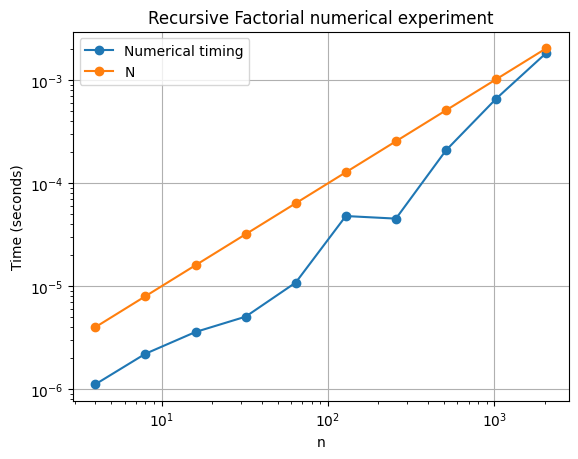

In [59]:

# Problem sizes to test
N = 2 ** np.arange(2, 12)   # from 4 up to 8192 (limited because recursion depth hits limit)
print (N)
times = []

# Measure run-time for each problem size using %timeit magic
for n in N:
    # We use IPython's internal magic function programmatically
    t = get_ipython().run_line_magic(
        'timeit', f'-q -n4 -r1 -o factorial({n})'
    )
    # t = %timeit -q -n4 -r1 -o factorial(n)
    times.append(t.best)

# Plot results
plt.loglog(N, times, 'o-', label='Numerical timing')
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.title("Recursive Factorial numerical experiment")

# Show reference line of O(n)
plt.loglog(N, 1e-6*N,'o-', label='N')

plt.legend()
plt.grid(True)
plt.show()


## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

[   4    8   16   32   64  128  256  512 1024 2048]


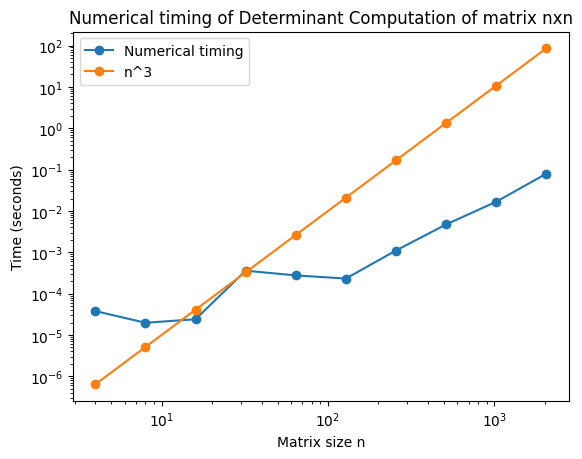

[3.7888685862223305e-05, 0.5208954673571055, 1.2167583573538028, 14.952501147315283, 0.7690400648601028, 0.8376925930714273, 4.76866037449082, 4.2660468450243965, 3.544224528745004, 4.774016961930977]


In [49]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
print(N)
times = []
 
# Benchmark determinant computation
for n in N:
    A = np.random.rand(n, n)
    t = get_ipython().run_line_magic(
        'timeit', f'-q -n3 -r1 -o np.linalg.det(np.random.rand({n}, {n}))'
    )
    times.append(t.best)
    
# Plot
plt.loglog(N, times, 'o-', label='Numerical timing')
plt.xlabel("Matrix size n")
plt.ylabel("Time (seconds)")
plt.title("Numerical timing of Determinant Computation of matrix nxn")


# Show reference line of O(n**3)
plt.loglog(N, 1e-8*N**3,'o-', label='n^3')

plt.legend()
plt.show()

# testing the relative speed as input size doubles, it
# should converge to 8 as n is doubled for sufficiently large n
# shows around 4.88 for n = 2^^11
# for i in range (len(times)-1, 0, -1):
#     times[i] = times[i] / times[i-1]

# print(times)

Plot result:

In [ ]:
...